# K-Means Clustering

K-Means Clustering is an unsupervised learning algorithm used for partitioning a dataset into $ K $ distinct, non-overlapping subsets (clusters). It is widely used for clustering problems in data mining and pattern recognition.

## How K-Means Clustering Works

1. **Initialization:**
   - Select $ K $ initial centroids randomly from the dataset.

2. **Assignment Step:**
   - Assign each data point to the nearest centroid based on the Euclidean distance.

3. **Update Step:**
   - Recalculate the centroids as the mean of all data points assigned to each centroid.

4. **Repeat:**
   - Repeat the assignment and update steps until the centroids do not change significantly or a maximum number of iterations is reached.

## Steps in K-Means Clustering

1. **Choose the Number of Clusters $ K $:**
   - The number of clusters needs to be specified in advance.

2. **Initialize Centroids:**
   - Randomly select $ K $ data points as initial centroids.

3. **Assign Points to Nearest Centroid:**
   - For each data point, calculate the distance to each centroid and assign it to the nearest one.

4. **Recalculate Centroids:**
   - Calculate the new centroids as the mean of all data points assigned to each cluster.

5. **Convergence Check:**
   - Repeat steps 3 and 4 until the centroids no longer change significantly.

## Advantages

- **Simple and Easy to Implement:** Intuitive and straightforward algorithm.
- **Efficient:** Works well with large datasets.
- **Scalable:** Computational complexity is linear with respect to the number of data points.

## Disadvantages

- **Choosing $ K $:** The number of clusters $ K $ needs to be specified beforehand, which may not always be known.
- **Sensitive to Initialization:** Different initializations can lead to different results.
- **Spherical Clusters:** Assumes clusters are spherical and equally sized, which may not always be the case.
- **Outliers:** Sensitive to outliers which can skew the results.

## Applications

- **Customer Segmentation:** Grouping customers based on purchasing behavior.
- **Image Compression:** Reducing the number of colors in an image.
- **Document Clustering:** Organizing a large set of documents into subsets.

## The Elbow method 

This method is used to identify optimal number of clusters

### Within-Cluster Sum of Squares (WCSS)

The Within-Cluster Sum of Squares (WCSS) is a measure of the total variance within each cluster in a K-Means clustering model. It is calculated as the sum of the squared differences between each data point and its corresponding cluster centroid.

$ WCSS = \sum_{k=1}^{K} \sum_{i \in C_k} \| x_i - \mu_k \|^2 $

Where:
- $ K $ is the number of clusters.
- $ C_k $ is the set of data points in the $ k $-th cluster.
- $ x_i $ is a data point in cluster $ k $.
- $ \mu_k $ is the centroid of the $ k $-th cluster.
- $ \| x_i - \mu_k \|^2 $ is the squared Euclidean distance between the data point $ x_i $ and the cluster centroid $ \mu_k $.

This formula sums the squared distances of each data point from its respective cluster centroid across all clusters, providing a measure of how compact the clusters are. A lower WCSS value indicates tighter clusters, which is generally desired.

### Visualization
<div style="display:flex">
<img src="./images/elbow_1.png" height="200px"/>
<img src="./images/elbow_2.png" height="200px" />
</div>
<div style="display:flex">
<img src="./images/elbow_3.png" height="200px"/>
</div>
<br/>
<img src="./images/elbow_map.png" height="200px" />

## Data preprocessing

### Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the dataset

In [5]:
dataset = pd.read_csv('./data/Mall_Customers.csv')

X = dataset[['Annual Income (k$)','Spending Score (1-100)']]
X = X.rename(columns={'Annual Income (k$)': 'income', 'Spending Score (1-100)': 'spending'})
X

,income,spending
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


### Using the elbow method to find the optimal number of clusters

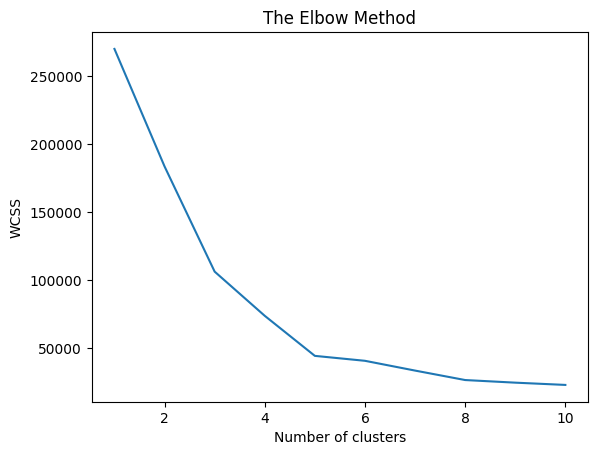

In [6]:
from sklearn.cluster import KMeans

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Training

### Training the K-means model on the Training set

In [7]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

## Visualisation

### Visualising the clusters

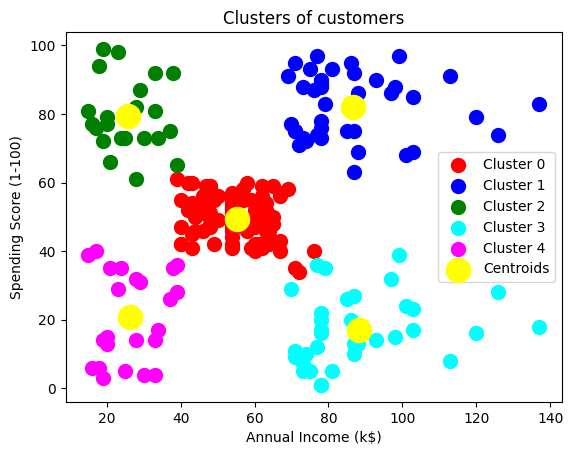

In [14]:
colors = ['red', 'blue', 'green', 'cyan', 'magenta']

for i in range(5):
    label = 'Cluster '+str(i)
    plt.scatter(X[y_kmeans == i]['income'], X[y_kmeans == i]['spending'], s = 100, c = colors[i], label = label)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()